In [35]:
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sb
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [36]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("Fake_News_DB.db")

In [37]:
data = pd.read_sql("SELECT * from fake_news", conn)
data

id                                                url  \
0        0  https://panorama.pub/28367-rossiyanam-zapretya...   
1        1  https://panorama.pub/28365-amerikanskij-genera...   
2        2  https://panorama.pub/28356-donald-tramp-pohval...   
3        3  https://panorama.pub/27498-formalnym-osnovanie...   
4        4  https://panorama.pub/28237-iran-oshibochno-pod...   
5        5  https://panorama.pub/28198-prezident-turkmenis...   
6        6  https://panorama.pub/28130-rosimushhestvo-pred...   
7        7  https://panorama.pub/28100-gorbachyov-poprosil...   
8        8  https://panorama.pub/27843-vdol-granitsy-rossi...   
9        9  https://panorama.pub/27987-rossiya-zakonchila-...   
10      10  https://panorama.pub/27976-budem-provodit-refe...   
11      11  https://panorama.pub/27928-delo-puteshestvenni...   
12      12  https://panorama.pub/27675-shtaty-ne-legalizov...   
13      13  https://panorama.pub/27819-gorbachyov-podderzh...   
14      14  https://panorama.pub/27749-minsporta-zapretilo...   
15      15  https://panorama.pub/22371-reabilitirovala-kru...   
16      16  https://panorama.pub/2538-amerikanskij-diploma...   
17      17  https://panorama.pub/27559-stavropolskij-kraj-...   
18      18  https://panorama.pub/27448-mezhdunarodnyj-isto...   
19      19  https://panorama.pub/27222-evroparlament-usili...   
20      20  https://panorama.pub/27325-siluanova-predstavi...   
21      21  https://panorama.pub/27228-pravitelstvo-finlya...   
22      22  https://panorama.pub/27326-greta-tunberg-okaza...   
23      23  https://panorama.pub/27322-umer-trezvyj-dvojni...   
24      24  https://panorama.pub/27199-milonov-nagrazhdyon...   
25      25  https://panorama.pub/27196-kommunisticheskij-n...   
26      26  https://panorama.pub/26728-niderlandy-ekstradi...   
27      27  https://panorama.pub/27040-mok-obyazhet-rossij...   
28      28         https://panorama.pub/26985-novyi-flag.html   
29      29  https://panorama.pub/26989-rodchenkov-poyavils...   
...    ...                                                ...   
4892  4892           https://ria.ru//20191218/1562539511.html   
4893  4893           https://ria.ru//20191218/1562535309.html   
4894  4894           https://ria.ru//20191218/1562531709.html   
4895  4895           https://ria.ru//20191218/1562524762.html   
4896  4896           https://ria.ru//20191218/1562524096.html   
4897  4897           https://ria.ru//20191218/1562514885.html   
4898  4898           https://ria.ru//20191218/1562488382.html   
4899  4899           https://ria.ru//20191218/1562494415.html   
4900  4900           https://ria.ru//20191218/1562497767.html   
4901  4901           https://ria.ru//20191218/1562502424.html   
4902  4902           https://ria.ru//20191219/1562605306.html   
4903  4903           https://ria.ru//20191219/1562592002.html   
4904  4904           https://ria.ru//20191219/1562575308.html   
4905  4905           https://ria.ru//20191219/1562565523.html   
4906  4906           https://ria.ru//20191219/1562530147.html   
4907  4907           https://ria.ru//20191219/1562558056.html   
4908  4908           https://ria.ru//20191218/1562549211.html   
4909  4909           https://ria.ru//20191218/1562547170.html   
4910  4910           https://ria.ru//20191218/1562542759.html   
4911  4911           https://ria.ru//20191218/1562542308.html   
4912  4912           https://ria.ru//20191218/1562539511.html   
4913  4913           https://ria.ru//20191218/1562535309.html   
4914  4914           https://ria.ru//20191218/1562531709.html   
4915  4915           https://ria.ru//20191218/1562524762.html   
4916  4916           https://ria.ru//20191218/1562524096.html   
4917  4917           https://ria.ru//20191218/1562514885.html   
4918  4918           https://ria.ru//20191218/1562488382.html   
4919  4919           https://ria.ru//20191218/1562494415.html   
4920  4920           https://ria.ru//20191218/1562497767.html   
4921  4921           https://ria.ru//201912

# EDA

In [38]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4922 entries, 0 to 4921
Data columns (total 8 columns):
id                 4922 non-null object
url                4922 non-null object
title              4922 non-null object
content            4922 non-null object
author             4922 non-null object
date               4922 non-null object
tags               4922 non-null object
type_of_article    4922 non-null object
dtypes: object(8)
memory usage: 307.7+ KB


In [39]:
print(data.shape)
print("\n")
print(data.columns)

(4922, 8)


Index(['id', 'url', 'title', 'content', 'author', 'date', 'tags',
       'type_of_article'],
      dtype='object')


In [40]:
data.isnull().sum().tolist()

[0, 0, 0, 0, 0, 0, 0, 0]

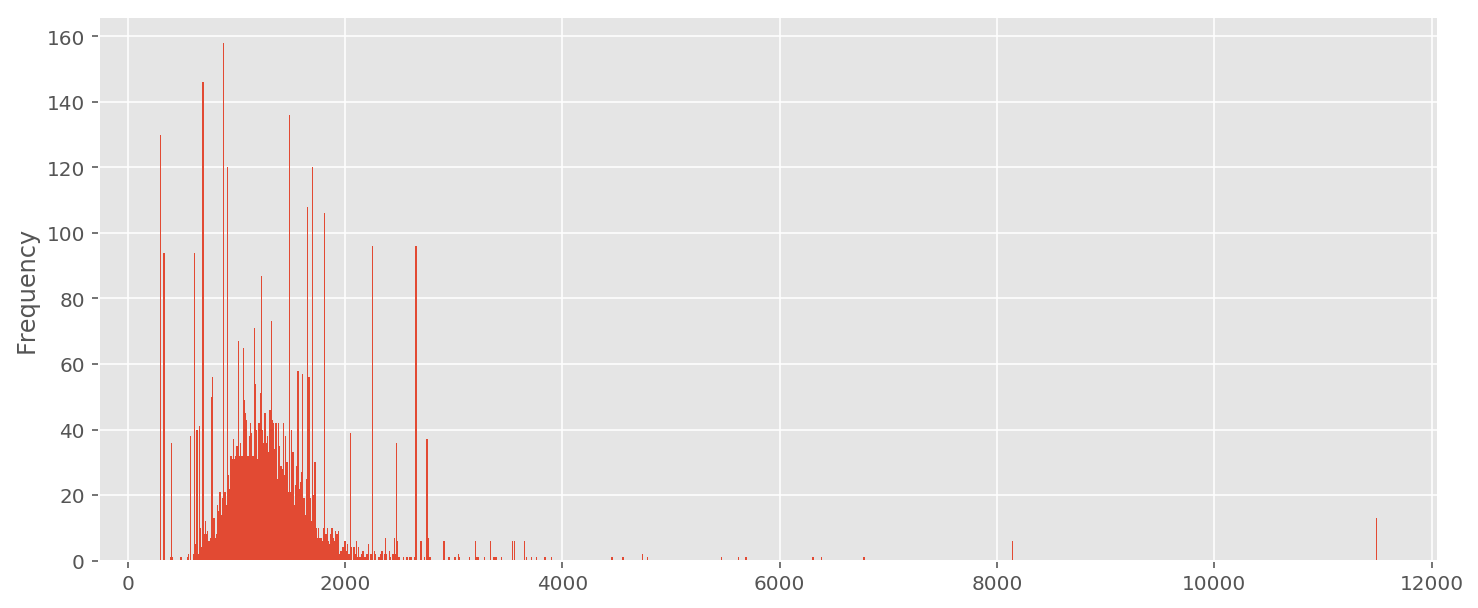

In [22]:
# Draw a graph of text length verse frequency

import matplotlib
%matplotlib inline
data['content'].str.len().plot(kind = 'hist', bins = 1000, figsize = (12,5))

In [44]:
# # Convert Unix Timestamp to Datetime
# data['date'] = pd.to_datetime(data['date'], unit='s')


# Show date-range of posts scraped from r/TheOnion and r/nottheonion

print("start date:", data['date'].min())
print("end date:", data['date'].max())

start date: 18.12.2019
end date: 2019-12-19


#Bar Plot Function 

In [11]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def bar_plot(x, y, title, color):    
    
    # Set up barplot 
    plt.figure(figsize=(9,5))
    g=sns.barplot(x, y, color = color)    
    ax=g

    # Label the graph
    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)

    # Enable bar values
    # Code modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for p in ax.patches:
        totals.append(p.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for p in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=10)

In [ ]:
# Set x values: # of posts 
for label in data["type_of_article"]:
    if label == 'fake':
        data_authors = data['author'].value_counts() 
        data_authors = data_authors[data_authors > 100].sort_values(ascending=False)
        
        # Set y values: Authors 
        data_authors_index = list(data_authors.index)
        
    # Call function
    bar_plot(data_authors.values, data_authors_index, 'Most Active Authors Fake: ', 'r')

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [ ]:
# Set x values: # of posts 

for label in data["type_of_article"]:
    if label == 'real':
        data_authors = data['author'].value_counts() 
        data_authors = data_authors[data_authors > 100].sort_values(ascending=False)
        
        # Set y values: Authors 
        data_authors_index = list(data_authors.index)
        
    # Call function
    bar_plot(data_authors.values, data_authors_index, 'Most Active Authors Real: ', 'r')

# Term document

Чтобы нормализовать содержание статей, нужно перевести все заглавные буквы в строчные и выбросить все знаки препинания. А затем разбить слова на список слов.

In [45]:
import nltk
from nltk.corpus import stopwords
from string import punctuation

nltk.download('punkt')

def clean_text(tokenized_list, sw):
    new_list = []
    nodes = [',', '*', '"', '.', '\'', '“', '”', '’', '‘', '，', '»', '—', '«']
    for doc in tokenized_list:
        new_list.append([token.lower() for token in doc if token.lower() not in sw and token.lower() not in nodes])
    return new_list

texts = data.content

#create mapping for string translate method
mapping_table = {ord(char): u' ' for char in punctuation}

tokenized = [nltk.word_tokenize(review.translate(mapping_table)) for review in texts]

# Remove punctuations and stopwords, and lower-case text
sw = stopwords.words('russian')
cleaned = clean_text(tokenized, sw)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/viktoriakoroleva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
cleaned

[['госдуму',
  'внесён',
  'законопроект',
  'защите',
  'положительного',
  'имиджа',
  'россии',
  'текстом',
  'которого',
  'предусматриваются',
  'ограничения',
  'граждан',
  'относительно',
  'контента',
  'загружаемого',
  'веб',
  'ресурсах',
  'мнению',
  'законодателей',
  'пользователям',
  'сети',
  'необходимо',
  'блокировать',
  'возможность',
  'загружать',
  'фото',
  'видеоматериалы',
  'потенциально',
  'носящие',
  'негативную',
  'коннотацию',
  'контексте',
  'россии',
  'дополнительном',
  'подзаконном',
  'акте',
  'законодатели',
  'разъясняют',
  'список',
  'таких',
  'материалов',
  'частности',
  'речь',
  'идёт',
  'фото',
  'видеофайлах',
  'демонстрирующих',
  'ветхие',
  'жилые',
  'заброшенные',
  'здания',
  'ненадлежащий',
  'внутренний',
  'интерьер',
  'квартир',
  'неровности',
  'тротуарах',
  'автодорогах',
  'места',
  'неконтролируемого',
  'скопления',
  'бытовых',
  'отходов',
  'дополнительно',
  'уделено',
  'внимание',
  'изображениям',


In [47]:
cloud_words = []
for i, row in enumerate(cleaned):
    if data.type_of_article[i] == 'fake':
        for word in row:
            cloud_words.append(word)

In [48]:
from gensim import corpora

# Create a dictionary from list of documents
dictionary = corpora.Dictionary(cleaned)

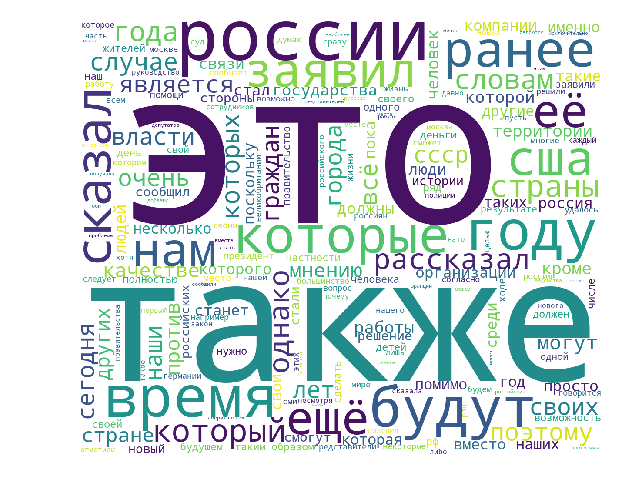

In [49]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(cloud_words))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [50]:
bigrams = nltk.bigrams(cloud_words)
from collections import Counter

counter = Counter(bigrams)
print(counter.most_common(20))

[(('таким', 'образом'), 162), (('2019', 'года'), 136), (('2018', 'года'), 111), (('ближайшее', 'время'), 94), (('2020', 'года'), 93), (('пресс', 'релизе'), 88), (('5', 'лет'), 85), (('стало', 'известно'), 85), (('–', 'это'), 79), (('настоящий', 'момент'), 78), (('сих', 'пор'), 75), (('премьер', 'министр'), 68), (('российской', 'федерации'), 67), (('пресс', 'службе'), 66), (('прошлом', 'году'), 63), (('лет', 'назад'), 61), (('прокомментировал', 'ситуацию'), 61), (('1', 'января'), 60), (('настоящее', 'время'), 60), (('дональд', 'трамп'), 56)]


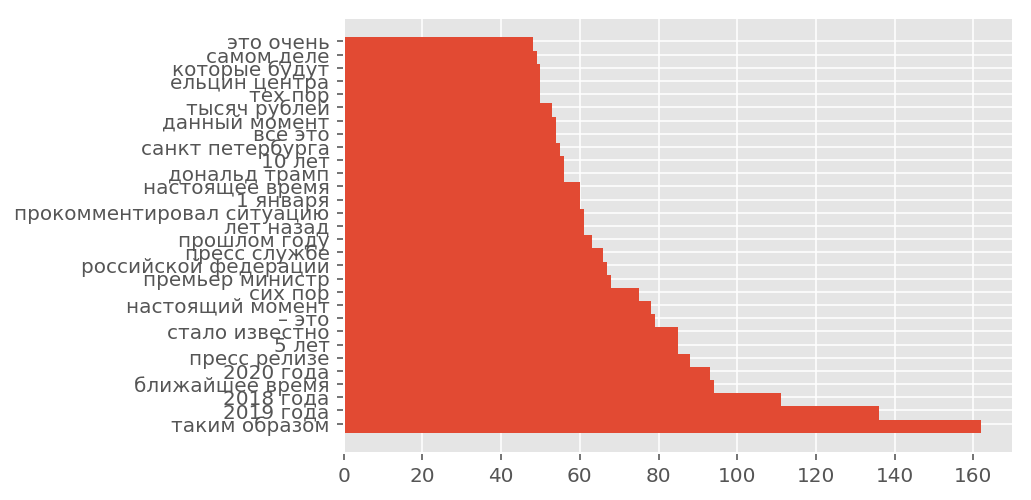

In [51]:
num_to_show = 30

labels = [" ".join(e[0]) for e in counter.most_common(num_to_show)]
values = [e[1] for e in counter.most_common(num_to_show)]

indexes = np.arange(len(labels))
width = 1

plt.barh(indexes, values, width)
plt.yticks(indexes + width * 0.2, labels)
plt.show()

In [52]:
def doc_length(text):
    return len([word for sent in text for word in sent])
data['doc_len'] = data['content'].apply(doc_length)
doc_lengths = list(data['doc_len'])
fakedoc_lengths = []
for i, label in enumerate(data.type_of_article):
    if label == 'fake':
        fakedoc_lengths.append(data['doc_len'][i])
data.drop(labels='doc_len', axis=1, inplace=True)
print("length of list:",len(doc_lengths),
      "\naverage document length", np.average(doc_lengths),
      "\nmaximum document length", max(doc_lengths))

length of list: 4922 
average document length 1351.9049167005282 
maximum document length 11499


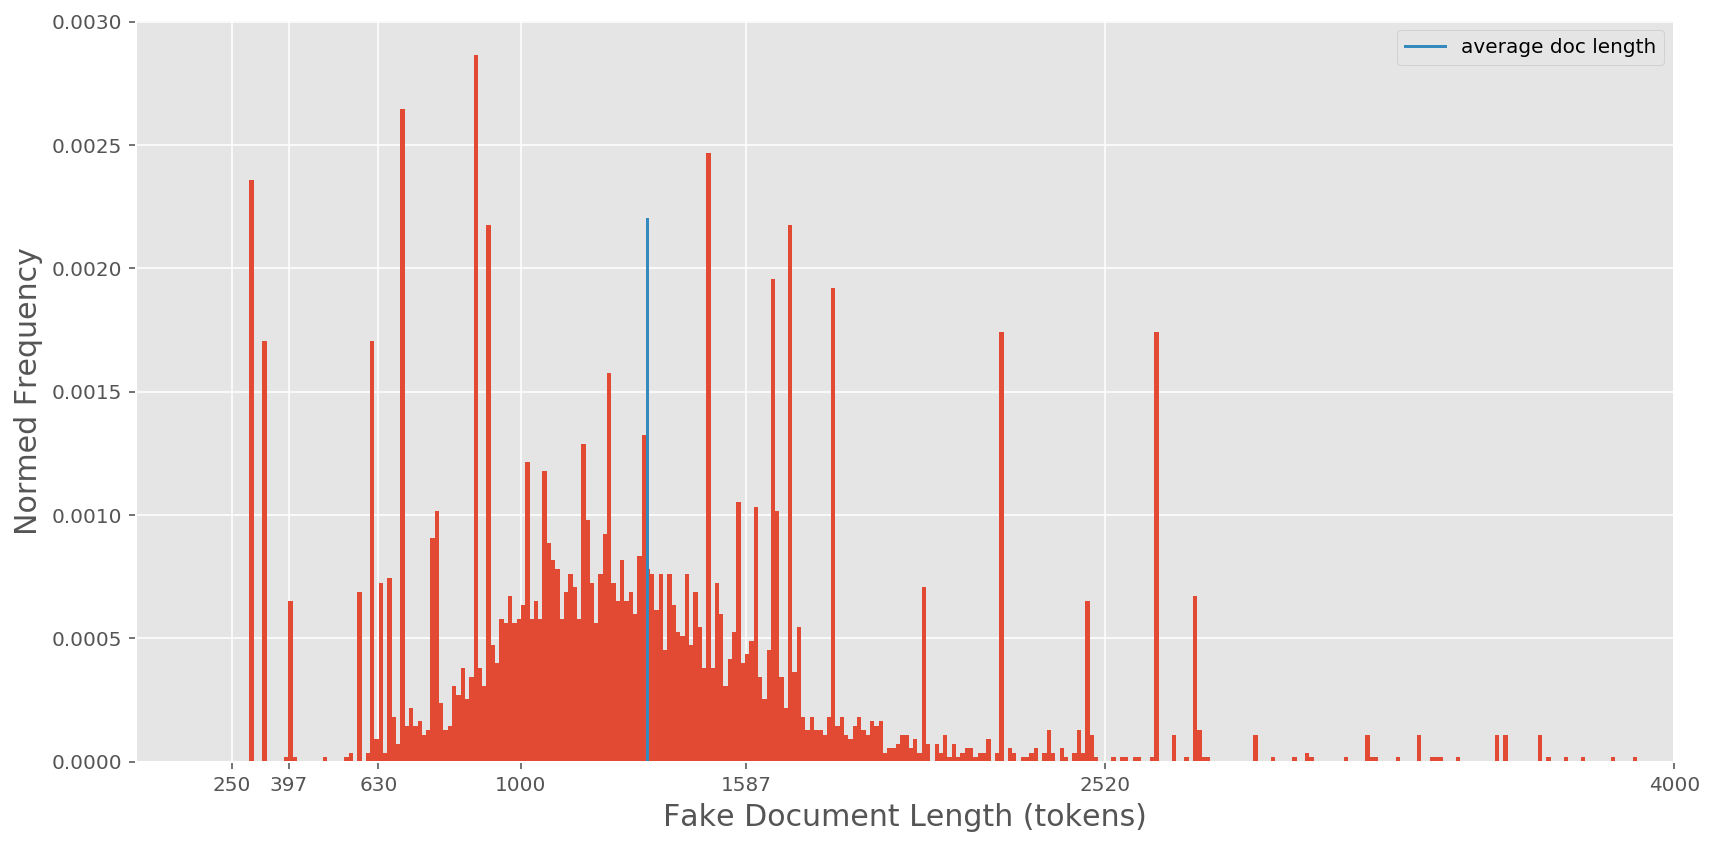

In [53]:
# plot a histogram of document length
num_bins = 1000
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
n, bins, patches = ax.hist(doc_lengths, num_bins, normed=1)
ax.set_xlabel('Fake Document Length (tokens)', fontsize=15)
ax.set_ylabel('Normed Frequency', fontsize=15)
ax.grid()
ax.set_xticks(np.logspace(start=np.log10(250),stop=np.log10(4000),num=7, base=10.0))
plt.xlim(0,4000)
ax.plot([np.average(fakedoc_lengths) for i in np.linspace(0.0,0.0022,100)], np.linspace(0.0,0.0022,100), '-',
        label='average doc length')
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

Если слов в статье больше 1500, то вероятность, что это фейковая статья значительно меньше.

In [11]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/viktoriakoroleva/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [54]:
from gensim.models import Doc2Vec, Word2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk.corpus import reuters

tokenized_docs = [nltk.word_tokenize(reuters.raw(fileid)) for fileid in reuters.fileids()]
tagged_docs = [TaggedDocument(doc, tags=[idx]) for idx, doc in enumerate(cleaned)]

# Vector transition

Используем два способа векторного представления слов, которые находятся в списке слов, созданном на предыдущем этапе (Word2Vec и Doc2Vec).

In [55]:
word_model = Word2Vec(cleaned, size = 300, window = 5, min_count = 1, 
                      alpha = 0.025, iter=10, batch_words = 10000)

In [56]:
word_vectors = np.zeros((len(data), 300))
for i in range(0, len(data)):
    word_vectors[i] = 0
    for word in cleaned[i]:
        word_vectors[i] += word_model[word]
    if len(cleaned[i]) != 0:
        word_vectors[i] = word_vectors[i] / len(cleaned[i])
word_vectors.shape

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


(4922, 300)

In [57]:
doc_model = Doc2Vec(size=300, window=5, min_count=5, dm = 1, iter=10)
doc_model.build_vocab(tagged_docs)
doc_model.train(tagged_docs, epochs=10, total_examples=doc_model.corpus_count)

/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [58]:
doc_vectors = []
for i in range(len(data)):
    doc_vectors.append(doc_model.docvecs[i])
doc_vectors = np.asarray(doc_vectors)
doc_vectors.shape

(4922, 300)

# Splitting

In [59]:
label = lambda i: 0 if i == 'fake' else 1
data.type_of_article = data.type_of_article.apply(label)
data.head()

id                                                url  \
0  0  https://panorama.pub/28367-rossiyanam-zapretya...   
1  1  https://panorama.pub/28365-amerikanskij-genera...   
2  2  https://panorama.pub/28356-donald-tramp-pohval...   
3  3  https://panorama.pub/27498-formalnym-osnovanie...   
4  4  https://panorama.pub/28237-iran-oshibochno-pod...   

                                               title  \
0  Россиянам запретят выкладывать в интернет непр...   
1  Американский генерал заявил о готовности стрел...   
2                     Дональд Трамп похвалил Сталина   
3  Формальным основанием для импичмента Трампа ст...   
4  Иранские моряки по ошибке подавили протесты в ...   

                                             content                author  \
0  В Госдуму внесён законопроект о «Защите положи...          Виталий Манн   
1  Командующий войсками Округа Колумбия генерал-л...  Бронислав Рубенштейн   
2  Президент США Дональд Трамп, отвечая на вопрос...          Виталий Манн   
3  Палата представителей США определилась с форму...  Бронислав Рубенштейн   
4  Признавая, что они были полностью сбиты массой...        Диана Арутюнян   

         date      tags  type_of_article  
0  2019-12-19  Политика                0  
1  2019-12-19  Политика                0  
2  2019-12-19  Политика                0  
3  2019-12-18  Политика                0  
4  2019-12-18  Политика                0

In [60]:
xw = word_vectors
xd = doc_vectors
y = np.array(data["type_of_article"])

from sklearn.model_selection import train_test_split
seed = 2
test_size = 0.3
xw_train, xw_test, yw_train, yw_test = train_test_split(xw, y, test_size=test_size, random_state=seed)
xd_train, xd_test, yd_train, yd_test = train_test_split(xd, y, test_size=test_size, random_state=seed)

# Logistic regression

In [61]:
import time
from sklearn.linear_model import LogisticRegression
LRw_model = LogisticRegression()
LRd_model = LogisticRegression()
LRw_model = LRw_model.fit(xw_train, yw_train)
LRd_model = LRd_model.fit(xd_train, yd_train)
print("Word2Vec + LR:",LRw_model.score(xw_test, yw_test))
print("Doc2Vec  + LR:",LRd_model.score(xd_test, yd_test))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Word2Vec + LR: 0.994583615436696
Doc2Vec  + LR: 0.7020988490182803


In [62]:
from sklearn.metrics import classification_report
target_names = ['fake', 'real']
yw_pred = LRw_model.predict(xw_test)
yd_pred = LRd_model.predict(xd_test)
print("Word2Vec + LR")
print(classification_report(yw_test, yw_pred, target_names=target_names))
print("Doc2Vec + LR")
print(classification_report(yd_test, yd_pred, target_names=target_names))

Word2Vec + LR
              precision    recall  f1-score   support

        fake       0.99      1.00      1.00       881
        real       1.00      0.99      0.99       596

   micro avg       0.99      0.99      0.99      1477
   macro avg       1.00      0.99      0.99      1477
weighted avg       0.99      0.99      0.99      1477

Doc2Vec + LR
              precision    recall  f1-score   support

        fake       0.71      0.84      0.77       881
        real       0.68      0.49      0.57       596

   micro avg       0.70      0.70      0.70      1477
   macro avg       0.70      0.67      0.67      1477
weighted avg       0.70      0.70      0.69      1477



In [63]:
from sklearn.metrics import * 
LRw_result = [accuracy_score(yw_test, yw_pred), precision_score(yw_test, yw_pred), 
              recall_score(yw_test, yw_pred), f1_score(yw_test, yw_pred)]
LRd_result = [accuracy_score(yd_test, yd_pred), precision_score(yd_test, yd_pred), 
              recall_score(yd_test, yd_pred), f1_score(yd_test, yd_pred)]

print("Word2Vec + LR")
print(LRw_result)
print("Doc2Vec + LR")
print(LRd_result)

Word2Vec + LR
[0.994583615436696, 1.0, 0.9865771812080537, 0.9932432432432432]
Doc2Vec + LR
[0.7020988490182803, 0.6797235023041475, 0.4949664429530201, 0.5728155339805825]


# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
RFw_model = RandomForestClassifier(n_estimators = 20, max_features=20, random_state=seed)
RFd_model = RandomForestClassifier(n_estimators = 20, max_features=20, random_state=seed)
RFw_model = RFw_model.fit(xw_train, yw_train)
RFd_model = RFd_model.fit(xd_train, yd_train)
print("Word2Vec + RF:",RFw_model.score(xw_test, yw_test))
print("Doc2Vec  + RF:",RFd_model.score(xd_test, yd_test))

Word2Vec + RF: 1.0
Doc2Vec  + RF: 0.9553148273527421


In [68]:
yw_pred = RFw_model.predict(xw_test)
yd_pred = RFd_model.predict(xd_test)
print("Word2Vec + RF")
print(classification_report(yw_test, yw_pred, target_names=target_names))
print("Doc2Vec + RF")
print(classification_report(yd_test, yd_pred, target_names=target_names))

Word2Vec + RF
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00       881
        real       1.00      1.00      1.00       596

   micro avg       1.00      1.00      1.00      1477
   macro avg       1.00      1.00      1.00      1477
weighted avg       1.00      1.00      1.00      1477

Doc2Vec + RF
              precision    recall  f1-score   support

        fake       0.95      0.98      0.96       881
        real       0.97      0.92      0.94       596

   micro avg       0.96      0.96      0.96      1477
   macro avg       0.96      0.95      0.95      1477
weighted avg       0.96      0.96      0.96      1477



In [69]:
from sklearn.metrics import * 
RFw_result = [accuracy_score(yw_test, yw_pred), precision_score(yw_test, yw_pred), 
              recall_score(yw_test, yw_pred), f1_score(yw_test, yw_pred)]
RFd_result = [accuracy_score(yd_test, yd_pred), precision_score(yd_test, yd_pred), 
              recall_score(yd_test, yd_pred), f1_score(yd_test, yd_pred)]

print("Word2Vec + RF")
print(RFw_result)
print("Doc2Vec + RF")
print(RFd_result)

Word2Vec + RF
[1.0, 1.0, 1.0, 1.0]
Doc2Vec + RF
[0.9553148273527421, 0.9715302491103203, 0.9161073825503355, 0.9430051813471502]


# XGboost

In [1]:
!pip install xgboost

  Using cached https://files.pythonhosted.org/packages/96/84/4e2cae6247f397f83d8adc5c2a2a0c5d7d790a14a4c7400ff6574586f589/xgboost-0.90.tar.gz
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /Users/viktoriakoroleva/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost


In [70]:
from xgboost import XGBClassifier
XGw_model = XGBClassifier(max_depth=7, learning_rate=0.2, 
                        n_estimators=20, silent=True, 
                        objective='binary:logistic', nthread=-1, 
                        gamma=0, min_child_weight=1, max_delta_step=0, 
                        subsample=1, colsample_bytree=1, 
                        colsample_bylevel=1, reg_alpha=0, 
                        reg_lambda=1, scale_pos_weight=1, 
                        base_score=0.5, seed=0, missing=None)
XGd_model = XGBClassifier(max_depth=7, learning_rate=0.2, 
                        n_estimators=20, silent=True, 
                        objective='binary:logistic', nthread=-1, 
                        gamma=0, min_child_weight=1, max_delta_step=0, 
                        subsample=1, colsample_bytree=1, 
                        colsample_bylevel=1, reg_alpha=0, 
                        reg_lambda=1, scale_pos_weight=1, 
                        base_score=0.5, seed=0, missing=None)
XGw_model = XGw_model.fit(xw_train, yw_train)
XGd_model = XGd_model.fit(xd_train, yd_train)
print("Word2Vec + XG:",XGw_model.score(xw_test, yw_test))
print("Doc2Vec  + XG:",XGd_model.score(xd_test, yd_test))

Word2Vec + XG: 0.998645903859174
Doc2Vec  + XG: 0.95260663507109


In [71]:
yw_pred = XGw_model.predict(xw_test)
yd_pred = XGd_model.predict(xd_test)
print("Word2Vec + XG")
print(classification_report(yw_test, yw_pred, target_names=target_names))
print("Doc2Vec + XG")
print(classification_report(yd_test, yd_pred, target_names=target_names))

Word2Vec + XG
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00       881
        real       1.00      1.00      1.00       596

   micro avg       1.00      1.00      1.00      1477
   macro avg       1.00      1.00      1.00      1477
weighted avg       1.00      1.00      1.00      1477

Doc2Vec + XG
              precision    recall  f1-score   support

        fake       0.95      0.97      0.96       881
        real       0.95      0.93      0.94       596

   micro avg       0.95      0.95      0.95      1477
   macro avg       0.95      0.95      0.95      1477
weighted avg       0.95      0.95      0.95      1477



In [72]:
from sklearn.metrics import * 
XGw_result = [accuracy_score(yw_test, yw_pred), precision_score(yw_test, yw_pred), 
              recall_score(yw_test, yw_pred), f1_score(yw_test, yw_pred)]
XGd_result = [accuracy_score(yd_test, yd_pred), precision_score(yd_test, yd_pred), 
              recall_score(yd_test, yd_pred), f1_score(yd_test, yd_pred)]
print("Word2Vec + XG")
print(XGw_result)
print("Doc2Vec + XG")
print(XGd_result)

Word2Vec + XG
[0.998645903859174, 0.9966555183946488, 1.0, 0.998324958123953]
Doc2Vec + XG
[0.95260663507109, 0.9534482758620689, 0.9278523489932886, 0.9404761904761905]


# Results

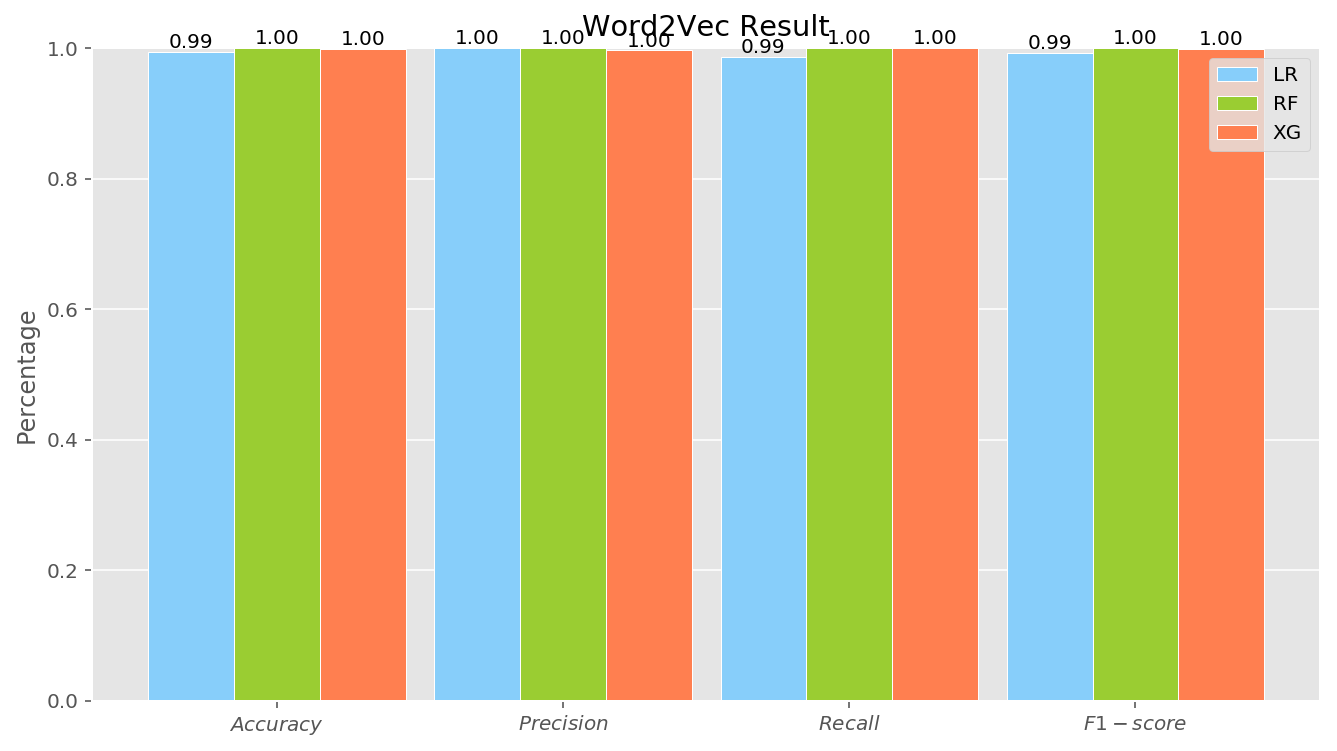

In [73]:
Y1 = np.array(LRw_result[:4])
Y2 = np.array(RFw_result[:4])
Y3 = np.array(XGw_result[:4])
from matplotlib import pyplot as plt
plt.figure(figsize=(11,6))
n = 4
X = np.arange(n)+1
plt.xticks([1.3,2.3,3.3,4.3],[r'$Accuracy$', r'$Precision$', r'$Recall$',r'$F1-score$'])
plt.bar(X,Y1,width = 0.3,facecolor = 'lightskyblue',edgecolor = 'white',label='LR')
plt.bar(X+0.3,Y2,width = 0.3,facecolor = 'yellowgreen',edgecolor = 'white',label='RF')
plt.bar(X+0.6, Y3, width = 0.3,facecolor = 'coral',edgecolor = 'white',label='XG')
for x,y in zip(X,Y1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,Y2):
    plt.text(x+0.3, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,Y3):
    plt.text(x+0.6, y, '%.2f' % y, ha='center', va= 'bottom')
plt.ylabel('Percentage')
plt.ylim(0,+1)
plt.legend()
plt.title('Word2Vec Result')
plt.show()

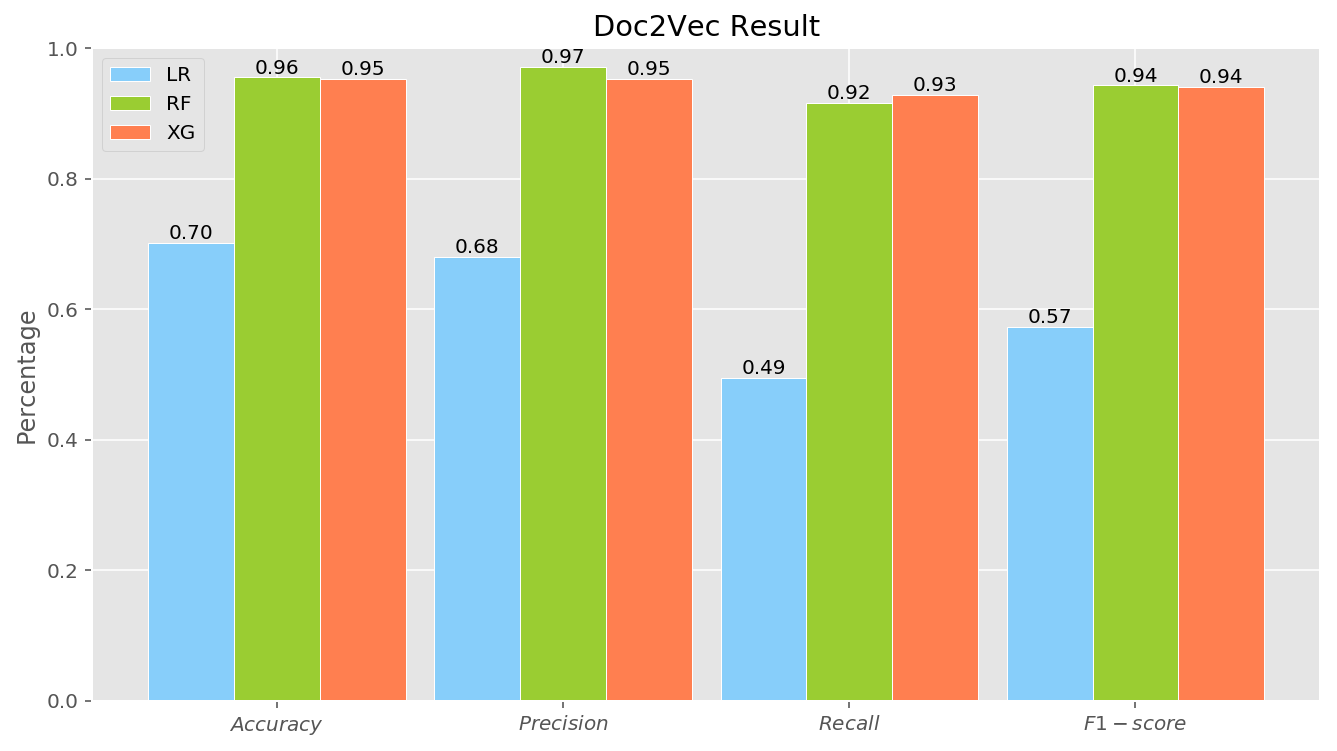

In [74]:
Y1 = np.array(LRd_result[:4])
Y2 = np.array(RFd_result[:4])
Y3 = np.array(XGd_result[:4])
from matplotlib import pyplot as plt
plt.figure(figsize=(11,6))
n = 4
X = np.arange(n)+1
plt.xticks([1.3,2.3,3.3,4.3],[r'$Accuracy$', r'$Precision$', r'$Recall$',r'$F1-score$'])
plt.bar(X,Y1,width = 0.3,facecolor = 'lightskyblue',edgecolor = 'white',label='LR')
plt.bar(X+0.3,Y2,width = 0.3,facecolor = 'yellowgreen',edgecolor = 'white',label='RF')
plt.bar(X+0.6, Y3, width = 0.3,facecolor = 'coral',edgecolor = 'white',label='XG')
for x,y in zip(X,Y1):
    plt.text(x, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,Y2):
    plt.text(x+0.3, y, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(X,Y3):
    plt.text(x+0.6, y, '%.2f' % y, ha='center', va= 'bottom')
plt.ylabel('Percentage')
plt.ylim(0,+1)
plt.legend()
plt.title('Doc2Vec Result')
plt.show()